In [2]:
import os
import time
#import JSON-RPC Pulse Streamer wrapper class, to use Google-RPC import from pulsestreamer.grpc
from pulsestreamer import PulseStreamer, Sequence, OutputState, findPulseStreamers
# impofr timetagger 
os.environ['TIMETAGGER_INSTALL_PATH'] = 'C:\Program Files\Swabian Instruments\Time Tagger'
import TimeTagger as tt

In [3]:
# activate tagger
_tagger = tt.createTimeTagger()
_tagger.reset()

# set trigger level to 1.5V
_tagger.setTriggerLevel(1, 1.5)
_tagger.sync()

# activate pulser
devices = findPulseStreamers()
# DHCP is activated in factory settings
if devices !=[]:
    ip = devices[0][0]
else:
    # if discovery failed try to connect by the default hostname
    # IP address of the pulse streamer (default hostname is 'pulsestreamer')
    print("No Pulse Streamer found")

#connect to the pulse streamer
pulser = PulseStreamer(ip)

# Print serial number and FPGA-ID
print('Serial: ' + pulser.getSerial())
print('FPGA ID: ' + pulser.getFPGAID())

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
Serial: 00:26:32:F0:A6:99
FPGA ID: 110D5C01BDEA814


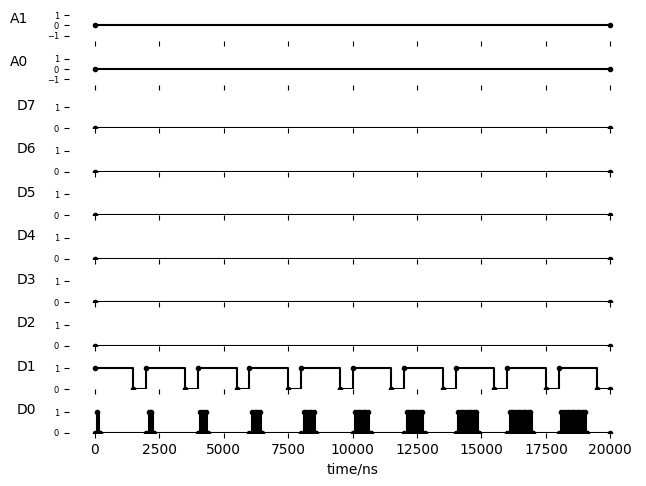

In [4]:
'''
Set pulser and tagger
'''
ch_sig = 0
ch_gate = 1

click_channel = 1
start_channel = 2
next_channel = -2

HIGH=1
LOW=0
seq_gate=[]
seq_sig=[]

#define pulse patterns for each channels
# simply add more pulses with ', (time, HIGH/LOW)'
for i in range(1,11):
    seq_gate += [(1500,HIGH),(500,LOW)]
    seq_sig += [(100,LOW)] + i*[(50,HIGH),(50,LOW)] + [(2000-100-i*100, LOW)]
#create the sequence
seq = Sequence()

#set digital channels
seq.setDigital(ch_gate, seq_gate)
seq.setDigital(ch_sig, seq_sig)


seq.plot()

''''
Configer Timetagger
'''
# self._number_of_gates = number_of_gates
bin_width = 10
record_length = 1500
n_bins = 150
n_histograms = 10
assert record_length % bin_width == 0, 'Bins number error!'



pulsed = tt.TimeDifferences(
    tagger=_tagger,
    click_channel=click_channel,
    start_channel=start_channel,
    next_channel=start_channel,
    sync_channel=tt.CHANNEL_UNUSED,
    binwidth=bin_width * 1000, # In ps
    n_bins=int(n_bins),
    n_histograms=n_histograms
)
pulsed.stop()
pulsed.clear()
pulsed.setMaxCounts(1000000)


In [22]:
pulsed.setMaxCounts(1000000)
pulsed.start()

time.sleep(0.5)
final = OutputState.ZERO()
pulser.stream(seq,-1, final)

In [416]:
pulsed.stop()

In [36]:
data = pulsed.getData()
index = pulsed.getIndex()
for i in range(0,10):
    print(sum(data[i]))
data[0]

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0, 1000000,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,     

In [46]:
if True and 0:
    print('yes')



In [39]:
pulsed.stop()
pulser.reset()
pulsed.clear()

In [346]:
print(pulsed.isRunning())

True


In [151]:
while True:
    if pulsed.getHistogramIndex() == 9:
        _data = pulsed.getData()
        for i in range(0,10):
            print(sum(_data[i]))
        break


4718770
9437540
14156310
18875080
23593850
28312620
33031390
37750160
42468930
47187690


In [4]:
while True:
 if pulsed.getHistogramIndex() == 9:
    pulsed.stop()
    break
data = pulsed.getData()
index = pulsed.getIndex()

In [9]:
for i in range(0,10):
    print(sum(data[i]))
data[0]

429216
858432
1287648
1716864
2146080
2575296
3004512
3433728
3862944
4292152


array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0, 429216,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [47]:
pulsed.clear()
tt.freeTimeTagger(_tagger)

True